In [20]:
import pandas as pd
df = pd.read_csv("D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Temperature.csv")
df.head()

,TimeVN,HaGiang,CaMau
0,2012-08-01 7:00,26.200001,25.400000
1,2012-08-01 10:00,31.400000,30.799999
2,2012-08-01 13:00,35.099998,30.000000
3,2012-08-01 16:00,35.799999,27.700001
4,2012-08-01 19:00,30.400000,28.100000


In [21]:
df.isnull().sum()

TimeVN       0
HaGiang    196
CaMau      250
dtype: int64

In [22]:
df[df.isnull().any(axis=1)]

,TimeVN,HaGiang,CaMau
19,2012-08-03 16:00,NaN,28.900000
20,2012-08-03 19:00,NaN,27.600000
21,2012-08-03 22:00,NaN,27.000000
22,2012-08-04 1:00,NaN,26.700001
23,2012-08-04 4:00,NaN,26.799999
...,...,...,...
12005,2016-09-09 22:00,27.900000,NaN
12076,2016-09-18 19:00,27.100000,NaN
12299,2016-10-16 16:00,33.200001,NaN
13163,2017-02-01 16:00,21.400000,NaN


In [23]:
#Chuyển đổi dữ liệu cột TimeVn về dạng chuỗi thời gian
df['TimeVN'] = pd.to_datetime(df['TimeVN'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21670 entries, 0 to 21669
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TimeVN   21670 non-null  datetime64[ns]
 1   HaGiang  21474 non-null  float64       
 2   CaMau    21420 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 508.0 KB


In [24]:
#Thiết lập cột TimeVn làm index cho DataFrame
df.columns


Index(['TimeVN', 'HaGiang', 'CaMau'], dtype='object')

In [26]:
df.set_index('TimeVN',inplace=True)

In [27]:
df.head()

,HaGiang,CaMau
TimeVN,,
2012-08-01 07:00:00,26.200001,25.400000
2012-08-01 10:00:00,31.400000,30.799999
2012-08-01 13:00:00,35.099998,30.000000
2012-08-01 16:00:00,35.799999,27.700001
2012-08-01 19:00:00,30.400000,28.100000


In [30]:
# Thống kê nhiệt độ của Hà Giang
v = df['HaGiang'].value_counts()

Text(0.5, 0, 'Temperature')

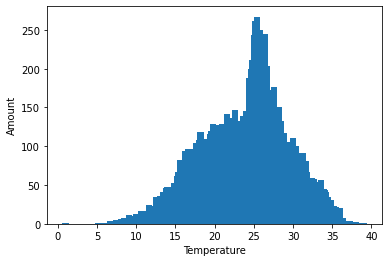

In [37]:
import matplotlib.pyplot as plt
plt.bar(v.index,v.values)
plt.ylabel('Amount',fontsize = 10)
plt.xlabel('Temperature', fontsize = 10)

In [36]:
# Thống kê nhiệt độ của Cà Mau
c = df['CaMau'].value_counts()


<BarContainer object of 178 artists>

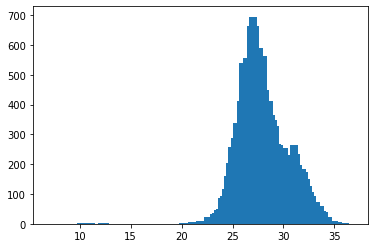

In [34]:
plt.bar(c.index,c.values)

In [38]:
df.index

DatetimeIndex(['2012-08-01 07:00:00', '2012-08-01 10:00:00',
               '2012-08-01 13:00:00', '2012-08-01 16:00:00',
               '2012-08-01 19:00:00', '2012-08-01 22:00:00',
               '2012-08-02 01:00:00', '2012-08-02 04:00:00',
               '2012-08-02 07:00:00', '2012-08-02 10:00:00',
               ...
               '2019-12-30 19:00:00', '2019-12-30 22:00:00',
               '2019-12-31 01:00:00', '2019-12-31 04:00:00',
               '2019-12-31 07:00:00', '2019-12-31 10:00:00',
               '2019-12-31 13:00:00', '2019-12-31 16:00:00',
               '2019-12-31 19:00:00', '2019-12-31 22:00:00'],
              dtype='datetime64[ns]', name='TimeVN', length=21670, freq=None)

In [39]:
# Lấy dữ liệu từ năm 2012-2013
df_new = df.loc['2012': '2013']

In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4142 entries, 2012-08-01 07:00:00 to 2013-12-31 22:00:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HaGiang  3962 non-null   float64
 1   CaMau    3953 non-null   float64
dtypes: float64(2)
memory usage: 97.1 KB


In [42]:
# Tính tổng nhiệt độ theo từng năm
yearly = df_new.resample('Y').sum()
yearly

,HaGiang,CaMau
TimeVN,,
2012-12-31,28087.800009,32886.999902
2013-12-31,64339.800021,76821.999884


Text(0, 0.5, 'Tổng nhiệt độ')

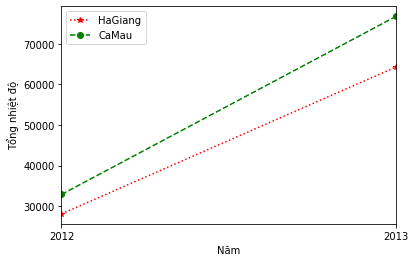

In [43]:
# Trực quan hóa biểu đồ
yearly.plot(style=[':*', '--o', '-s'], color=['red','green','blue'])
plt.xlabel('Năm')
plt.ylabel("Tổng nhiệt độ")


In [49]:
# Thống kê nhiệt độ qua từng tháng
df_new_2 = df.loc['2012'] # dữ liệu năm 2012
data_month = df_new_2.resample('M').sum()
data_month


,HaGiang,CaMau
TimeVN,,
2012-08-31,6636.300007,6607.199993
2012-09-30,5972.399992,6025.499973
2012-10-31,5966.400000,6751.799979
2012-11-30,5115.200002,6658.900000
2012-12-31,4397.500009,6843.599957


Text(0, 0.5, 'Tổng nhiệt độ theo từng tháng')

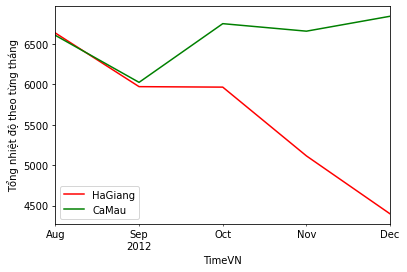

In [50]:
data_month.plot(style=['-', '-', '-'], color=['red','green','blue'])
plt.ylabel("Tổng nhiệt độ theo từng tháng")

In [51]:
# Nhiệt độ của tháng Thứ 8 trong năm 2012
data_day = df_new_2.resample('D').sum()

Text(0, 0.5, 'Tổng nhiệt độ theo từng ngày')

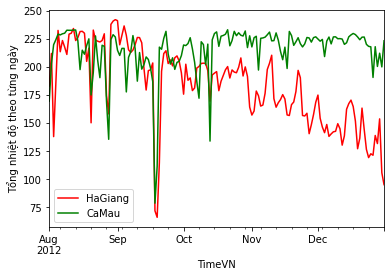

In [54]:
data_day.plot(style=['-', '-', '-'], color=['red','green','blue'])
plt.ylabel("Tổng nhiệt độ theo từng ngày")

In [56]:
# Thống kê nhiệt độ trung bình từng giờ trong dataset
by_time = df.groupby(df.index.time).mean()
by_time

,HaGiang,CaMau
01:00:00,22.022268,26.610396
04:00:00,21.471594,26.145578
07:00:00,21.426144,26.430194
10:00:00,24.211136,29.528656
13:00:00,26.886850,30.583290
16:00:00,27.014504,29.727191
19:00:00,24.347190,27.825103
22:00:00,22.884136,27.084572


<AxesSubplot:xlabel='time'>

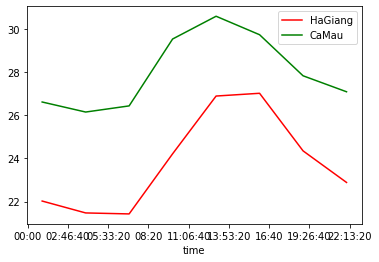

In [57]:
by_time.plot(style=['-', '-', '-'], color=['red','green','blue'])